# 导入需要的库 

In [49]:
import pandas as pd
import numpy as np
import csv
import collections
from scipy.interpolate import lagrange
from datetime import datetime
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.3f'%x)#不用科学计数法显示数字
import matplotlib.pyplot as plt
%matplotlib inline

# 导入数据，并转为np数组

In [51]:
df1 = pd.read_csv('./MIMIC/mini_chart_events.csv')
df2 = pd.read_csv('./MIMIC/mini_label_events.csv')

C:\Users\Mingruihuang\AppData\Local\Temp\ipykernel_1884\2432246474.py:1: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('./MIMIC/mini_chart_events.csv')


In [52]:
df1

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,304858,3379,142774,238507.000,220046,2162-05-27 20:00:00,2162-05-27 20:48:00,17574.000,120.000,120.000,bpm,0.000,0.000,NaN,NaN
1,304859,3379,142774,238507.000,220047,2162-05-27 20:00:00,2162-05-27 20:48:00,17574.000,60.000,60.000,bpm,0.000,0.000,NaN,NaN
2,304860,3379,142774,238507.000,223751,2162-05-27 20:00:00,2162-05-27 20:49:00,17574.000,160.000,160.000,mmHg,0.000,0.000,NaN,NaN
3,304861,3379,142774,238507.000,223752,2162-05-27 20:00:00,2162-05-27 20:49:00,17574.000,90.000,90.000,mmHg,0.000,0.000,NaN,NaN
4,304862,3379,142774,238507.000,223761,2162-05-27 20:00:00,2162-05-27 20:49:00,17574.000,99.400,99.400,?F,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388374,330605881,99863,100749,216757.000,224370,2142-04-26 21:00:00,2142-04-26 21:17:00,16351.000,White,NaN,NaN,0.000,0.000,NaN,NaN
3388375,330605882,99863,100749,216757.000,224372,2142-04-26 21:00:00,2142-04-26 21:17:00,16351.000,Suctioned,NaN,NaN,0.000,0.000,NaN,NaN
3388376,330605883,99863,100749,216757.000,224373,2142-04-26 21:00:00,2142-04-26 21:17:00,16351.000,Scant,NaN,NaN,0.000,0.000,NaN,NaN
3388377,330605884,99863,100749,216757.000,224642,2142-04-26 21:00:00,2142-04-26 21:43:00,20061.000,Oral,NaN,NaN,0.000,0.000,NaN,NaN


In [53]:
df2

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,71572,127,NaN,50861,2183-08-08 13:23:00,14,14.000,IU/L,NaN
1,71573,127,NaN,50862,2183-08-08 13:23:00,3.4,3.400,g/dL,abnormal
2,71574,127,NaN,50863,2183-08-08 13:23:00,91,91.000,IU/L,NaN
3,71575,127,NaN,50878,2183-08-08 13:23:00,24,24.000,IU/L,NaN
4,71576,127,NaN,50893,2183-08-08 13:23:00,9.1,9.100,mg/dL,NaN
...,...,...,...,...,...,...,...,...,...
290660,27777211,99085,147862.000,51200,2130-06-11 05:15:00,0.1,0.100,%,NaN
290661,27777212,99085,147862.000,51221,2130-06-11 05:15:00,37.2,37.200,%,NaN
290662,27777213,99085,147862.000,51222,2130-06-11 05:15:00,12.7,12.700,g/dL,NaN
290663,27777214,99085,147862.000,51237,2130-06-11 05:15:00,1.2,1.200,NaN,abnormal


In [54]:
df1_ndarray = np.array(df1)
df2_ndarray = np.array(df2)

In [55]:
df1_ndarray

array([[304858, 3379, 142774, ..., 0.0, nan, nan],
       [304859, 3379, 142774, ..., 0.0, nan, nan],
       [304860, 3379, 142774, ..., 0.0, nan, nan],
       ...,
       [330605883, 99863, 100749, ..., 0.0, nan, nan],
       [330605884, 99863, 100749, ..., 0.0, nan, nan],
       [330605885, 99863, 100749, ..., 0.0, nan, nan]], dtype=object)

In [56]:
df2_ndarray

array([[71572, 127, nan, ..., 14.0, 'IU/L', nan],
       [71573, 127, nan, ..., 3.4, 'g/dL', 'abnormal'],
       [71574, 127, nan, ..., 91.0, 'IU/L', nan],
       ...,
       [27777213, 99085, 147862.0, ..., 12.7, 'g/dL', nan],
       [27777214, 99085, 147862.0, ..., 1.2, nan, 'abnormal'],
       [27777215, 99085, 147862.0, ..., 16.7, '%', 'abnormal']],
      dtype=object)

# 提取出需要的数据

In [57]:
o2co2data = []
for i in range(len(df1_ndarray)):
    if(df1_ndarray[i][4] == 490 or df1_ndarray[i][4] == 3785 or df1_ndarray[i][4] == 3837 or df1_ndarray[i][4] == 50821):
        o2co2data.append([df1_ndarray[i][1], df1_ndarray[i][5], df1_ndarray[i][8], ''])
    if (df1_ndarray[i][4] == 3784 or df1_ndarray[i][4] == 3835 or df1_ndarray[i][4] == 50818):
        o2co2data.append([df1_ndarray[i][1], df1_ndarray[i][5], '', df1_ndarray[i][8]])
o2co2data

[[907, '2155-08-21 19:00:00', '257.20001220703125', ''],
 [946, '2120-05-05 05:00:00', '308.5', ''],
 [946, '2120-05-10 10:59:00', '247.19999694824219', ''],
 [4033, '2159-06-15 01:00:00', '', '58'],
 [4033, '2159-06-15 01:00:00', '50', ''],
 [4033, '2159-06-20 17:00:00', '', nan],
 [4033, '2159-06-20 17:00:00', nan, ''],
 [4367, '2120-09-30 16:00:00', '657', ''],
 [6843, '2142-06-15 03:15:00', '', '40'],
 [6843, '2142-06-14 12:00:00', '', '45'],
 [6843, '2142-06-14 12:00:00', '73', ''],
 [6843, '2142-06-14 11:50:00', '', '45'],
 [6843, '2142-06-14 11:50:00', '73', ''],
 [6843, '2142-06-14 17:00:00', '', '22'],
 [6843, '2142-06-14 17:00:00', '82', ''],
 [6843, '2142-06-14 17:07:00', '', '22'],
 [6843, '2142-06-14 17:07:00', '82', ''],
 [6843, '2142-06-18 14:00:00', '', nan],
 [6843, '2142-06-18 14:00:00', nan, ''],
 [6843, '2142-06-14 08:20:00', '', '46'],
 [6843, '2142-06-14 08:20:00', '73', ''],
 [6843, '2142-06-15 03:15:00', '88', ''],
 [7073, '2128-08-31 23:00:00', '644', ''],
 [71

In [58]:
for i in range(len(df2_ndarray)):
    if(df2_ndarray[i][3] == 490 or df2_ndarray[i][3] == 3785 or df2_ndarray[i][3] == 3837 or df2_ndarray[i][3] == 50821):
        o2co2data.append([df2_ndarray[i][1], df2_ndarray[i][4], df2_ndarray[i][5], ''])
    if (df2_ndarray[i][3] == 3784 or df2_ndarray[i][3] == 3835 or df2_ndarray[i][3] == 50818):
        o2co2data.append([df2_ndarray[i][1], df2_ndarray[i][4], '', df2_ndarray[i][5]])
o2co2data

[[907, '2155-08-21 19:00:00', '257.20001220703125', ''],
 [946, '2120-05-05 05:00:00', '308.5', ''],
 [946, '2120-05-10 10:59:00', '247.19999694824219', ''],
 [4033, '2159-06-15 01:00:00', '', '58'],
 [4033, '2159-06-15 01:00:00', '50', ''],
 [4033, '2159-06-20 17:00:00', '', nan],
 [4033, '2159-06-20 17:00:00', nan, ''],
 [4367, '2120-09-30 16:00:00', '657', ''],
 [6843, '2142-06-15 03:15:00', '', '40'],
 [6843, '2142-06-14 12:00:00', '', '45'],
 [6843, '2142-06-14 12:00:00', '73', ''],
 [6843, '2142-06-14 11:50:00', '', '45'],
 [6843, '2142-06-14 11:50:00', '73', ''],
 [6843, '2142-06-14 17:00:00', '', '22'],
 [6843, '2142-06-14 17:00:00', '82', ''],
 [6843, '2142-06-14 17:07:00', '', '22'],
 [6843, '2142-06-14 17:07:00', '82', ''],
 [6843, '2142-06-18 14:00:00', '', nan],
 [6843, '2142-06-18 14:00:00', nan, ''],
 [6843, '2142-06-14 08:20:00', '', '46'],
 [6843, '2142-06-14 08:20:00', '73', ''],
 [6843, '2142-06-15 03:15:00', '88', ''],
 [7073, '2128-08-31 23:00:00', '644', ''],
 [71

# 数组转换，并保存提取出的数据

In [59]:
for i in o2co2data:
    for j in o2co2data:
        if (j[2] == ''):
            if (j[0] == i[0] and j[1] == i[1]):
                j[2] = i[2]
        if (j[3] == ''):
            if (j[0] == i[0] and j[1] == i[1]):
                j[3] = i[3]
o2co2data

[[907, '2155-08-21 19:00:00', '257.20001220703125', '28'],
 [946, '2120-05-05 05:00:00', '308.5', '48'],
 [946, '2120-05-10 10:59:00', '247.19999694824219', '38'],
 [4033, '2159-06-15 01:00:00', '50', '58'],
 [4033, '2159-06-15 01:00:00', '50', '58'],
 [4033, '2159-06-20 17:00:00', nan, nan],
 [4033, '2159-06-20 17:00:00', nan, nan],
 [4367, '2120-09-30 16:00:00', '657', '56'],
 [6843, '2142-06-15 03:15:00', '88', '40'],
 [6843, '2142-06-14 12:00:00', '73', '45'],
 [6843, '2142-06-14 12:00:00', '73', '45'],
 [6843, '2142-06-14 11:50:00', '73', '45'],
 [6843, '2142-06-14 11:50:00', '73', '45'],
 [6843, '2142-06-14 17:00:00', '82', '22'],
 [6843, '2142-06-14 17:00:00', '82', '22'],
 [6843, '2142-06-14 17:07:00', '82', '22'],
 [6843, '2142-06-14 17:07:00', '82', '22'],
 [6843, '2142-06-18 14:00:00', nan, nan],
 [6843, '2142-06-18 14:00:00', nan, nan],
 [6843, '2142-06-14 08:20:00', '73', '46'],
 [6843, '2142-06-14 08:20:00', '73', '46'],
 [6843, '2142-06-15 03:15:00', '88', '40'],
 [7073,

In [61]:
head = ['subject_id', 'charttime', 'pO2', 'pCO2']
with open(r'./MIMIC/o2co2data.csv', 'w', newline='') as f3:
    writer = csv.writer(f3)
    writer.writerow(head)
    writer.writerows(o2co2data)

# 读取保存的有用数据

In [62]:
df = pd.read_csv('./MIMIC/o2co2data.csv')
df

,subject_id,charttime,pO2,pCO2
0,907,2155-08-21 19:00:00,257.20001220703125,28
1,946,2120-05-05 05:00:00,308.5,48
2,946,2120-05-10 10:59:00,247.19999694824219,38
3,4033,2159-06-15 01:00:00,50,58
4,4033,2159-06-15 01:00:00,50,58
...,...,...,...,...
9608,99085,2130-12-08 14:19:00,180,42
9609,99085,2130-12-14 20:22:00,69,46
9610,99085,2130-12-14 20:22:00,69,46
9611,99085,2131-02-08 21:04:00,68,47


# 找到重复的数据并把它剔除

In [63]:
df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4        True
        ...  
9608     True
9609    False
9610     True
9611    False
9612     True
Length: 9613, dtype: bool

In [64]:
df = df.drop_duplicates()

# 查看是否有缺失值，并把含有缺失值的数据剔除

In [65]:
df.isnull().sum()

subject_id     0
charttime      0
pO2           15
pCO2          15
dtype: int64

In [66]:
df = df.dropna()

# 把object类型数据转为float

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9611
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject_id  4712 non-null   int64 
 1   charttime   4712 non-null   object
 2   pO2         4712 non-null   object
 3   pCO2        4712 non-null   object
dtypes: int64(1), object(3)
memory usage: 184.1+ KB


In [68]:
df["pO2"] = pd.to_numeric(df["pO2"],errors='coerce')
df["pCO2"] = pd.to_numeric(df["pCO2"],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4712 entries, 0 to 9611
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  4712 non-null   int64  
 1   charttime   4712 non-null   object 
 2   pO2         4711 non-null   float64
 3   pCO2        4711 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 184.1+ KB


In [70]:
df.describe()

,subject_id,pO2,pCO2
count,4712.000,4711.000,4711.000
mean,27821.661,146.186,42.435
std,25809.511,102.330,10.513
min,127.000,19.000,8.000
25%,9978.000,81.000,36.000
50%,20280.000,114.000,41.000
75%,32476.000,171.500,47.000
max,99863.000,689.000,121.000


# 利用箱型图查看离群值

[308.5 657.0 644.0 670.0 310.5 347.0 461.0 359.0 309.0 349.0 477.0 363.0
 404.0 350.0 407.0 402.0 320.0 328.0 320.0 357.0 442.0 483.0 485.0 389.0
 575.0 398.0 406.0 360.0 336.0 317.0 494.0 426.0 370.0 315.0 401.0 349.0
 434.0 360.0 343.0 361.0 407.0 313.0 512.0 348.0 383.0 410.0 423.0 380.0
 321.0 332.0 463.0 390.0 342.0 400.0 555.0 428.0 430.0 335.0 408.0 399.0
 316.0 365.0 385.0 360.0 341.0 372.0 425.0 377.0 313.0 344.0 455.0 486.0
 347.0 377.0 490.0 331.0 440.0 328.0 334.0 333.0 315.0 341.0 409.0 394.0
 319.0 347.0 362.0 366.0 502.0 341.0 469.0 386.0 418.0 341.0 485.0 347.0
 449.0 321.0 412.0 405.0 329.0 380.0 435.0 355.0 477.0 470.0 382.0 312.0
 317.0 353.0 442.0 340.0 333.0 344.0 332.0 346.0 331.0 384.0 357.0 326.0
 469.0 437.0 347.0 468.0 378.0 369.0 314.0 312.0 333.0 504.0 309.0 332.0
 308.0 309.0 364.0 398.0 309.0 473.0 343.0 386.0 398.0 421.0 457.0 323.0
 327.0 494.0 460.0 380.0 348.0 348.0 323.0 427.0 374.0 396.0 352.0 460.0
 469.0 689.0 598.0 448.0 393.0 309.0 415.0 418.0 31

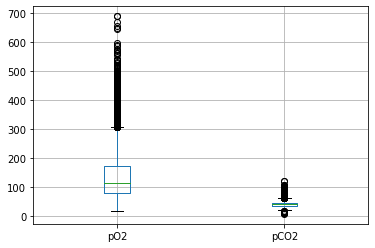

In [71]:
outliner = df.boxplot(column=list(df.columns[2:]), return_type='dict')
out_pO2 = outliner['fliers'][0].get_ydata()
print(out_pO2)
out_pCO2 = outliner['fliers'][1].get_ydata()
print(out_pCO2)
plt.show()

# 用平均值代替离群值

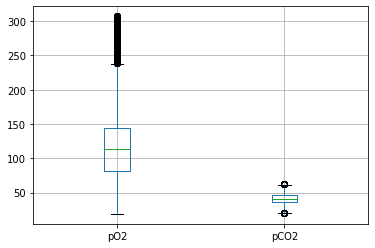

In [72]:
pO2_mean = (df['pO2'].sum() - out_pO2.sum()) / (len(df['pO2']) - len(out_pO2))
pCO2_mean = (df['pCO2'].sum() - out_pCO2.sum()) / (len(df['pCO2']) - len(out_pCO2))
df['pO2'].replace(out_pO2, pO2_mean, inplace=True)
df['pCO2'].replace(out_pCO2, pCO2_mean, inplace=True)
outliner = df.boxplot(column=list(df.columns[2:]), return_type='dict')
plt.show()

In [73]:
df.describe()

,subject_id,pO2,pCO2
count,4712.000,4711.000,4711.000
mean,27821.661,118.803,41.148
std,25809.511,55.685,7.695
min,127.000,19.000,20.000
25%,9978.000,81.000,36.000
50%,20280.000,114.000,41.000
75%,32476.000,144.000,46.000
max,99863.000,307.000,63.000


# 插值运算

In [44]:
subject_id = 770
n = 10
person = df[df['subject_id'] == subject_id]
print(person)


     subject_id            charttime     pO2   pCO2
576         770  2127-04-25 16:31:00 130.000 23.000
578         770  2127-02-06 09:01:00  76.000 44.000
580         770  2127-02-08 05:29:00 234.000 38.000
582         770  2127-02-08 06:23:00  94.000 40.000
584         770  2127-02-08 13:06:00  76.000 44.000
586         770  2127-02-08 14:34:00 108.000 45.000
588         770  2127-02-03 12:44:00  42.000 38.000
590         770  2127-02-13 05:44:00 128.000 40.000
592         770  2127-02-14 05:35:00 130.000 34.000
594         770  2127-02-14 15:29:00  84.000 31.000
596         770  2127-02-14 15:30:00  39.000 38.000
598         770  2127-02-14 21:30:00  40.000 38.000
600         770  2127-02-14 21:35:00 102.000 33.000
602         770  2127-02-09 03:54:00 130.000 40.000
604         770  2127-02-09 12:24:00 115.000 40.000
606         770  2127-02-09 19:05:00 176.000 38.000
608         770  2127-02-10 04:31:00 123.000 38.000
610         770  2127-02-10 17:24:00  83.000 36.000
612         

In [45]:
#以小时作为横坐标轴
x_time = person['charttime']
x_second = []
for i in x_time:
    x_second.append(datetime.strptime(i, '%Y-%m-%d %H:%M:%S').timestamp() / 3600)
x_second2 = []
for i in x_second:
    x_second2.append(i - min(x_second))

Text(0.5, 1.0, 'subject_id = 770')

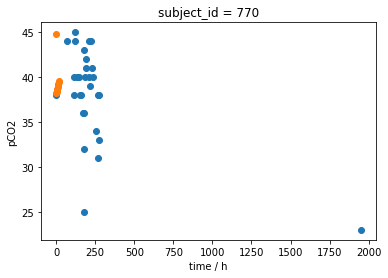

In [46]:
#拉格朗日插值法插值pCO2
y_pCO2 = list(person['pCO2'])
# 采集时间间隔为2小时对pco2进行插值
lag_x_second2 = list(range(0, int(max(x_second2)), 2))
lag_y_pCO2 = []
for i in lag_x_second2[:n]:
    x_small = []
    y_small = []
    x_big = []
    y_big = []
    for j in x_second2:
        if (i > j):
            x_small.append(j)
            y_small.append(y_pCO2[x_second2.index(j)])
        if (i < j):
            x_big.append(j)
            y_big.append(y_pCO2[x_second2.index(j)])
    x = x_small[len(x_small) - 2 if len(x_small) > 2 else 0:]
    x.extend(x_big[:2 if len(x_big) > 2 else len(x_big)])
    y = y_small[len(y_small) - 2 if len(y_small) > 2 else 0:]
    y.extend(y_big[:2 if len(y_big) > 2 else len(y_big)])
    lag = lagrange(x, y)
    lag_y_pCO2.append(lag(i))

plt.scatter(x_second2, y_pCO2)
plt.scatter(lag_x_second2[:n], lag_y_pCO2)
plt.xlabel('time / h')
plt.ylabel('pCO2')
plt.title('subject_id = %d' % subject_id)

Text(0.5, 1.0, 'subject_id = 770')

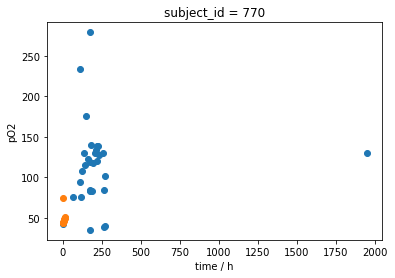

In [47]:
# 拉格朗日插值法插值pO2
y_pO2 = list(person['pO2'])
# 2小时时间间隔对pO2插值
lag_x_second2 = list(range(0, int(max(x_second2)), 2))
lag_y_pO2 = []
for i in lag_x_second2[:n]:
    x_small = []
    y_small = []
    x_big = []
    y_big = []
    for j in x_second2:
        if (i > j):
            x_small.append(j)
            y_small.append(y_pO2[x_second2.index(j)])
        if (i < j):
            x_big.append(j)
            y_big.append(y_pO2[x_second2.index(j)])
    x = x_small[len(x_small) - 2 if len(x_small) > 2 else 0:]
    x.extend(x_big[:2 if len(x_big) > 2 else len(x_big)])
    y = y_small[len(y_small) - 2 if len(y_small) > 2 else 0:]
    y.extend(y_big[:2 if len(y_big) > 2 else len(y_big)])
    lag = lagrange(x, y)
    lag_y_pO2.append(lag(i))

plt.scatter(x_second2, y_pO2)
plt.scatter(lag_x_second2[:n], lag_y_pO2)
plt.xlabel('time / h')
plt.ylabel('pO2')
plt.title('subject_id = %d' % subject_id)